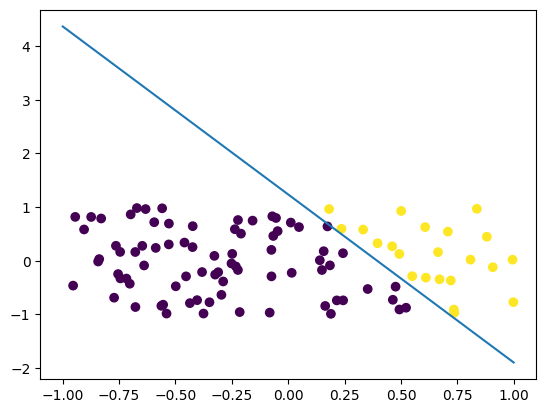

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target function f
def target_function(x):
    # Define two random points
    point1 = np.random.uniform(-1, 1, size=2)
    point2 = np.random.uniform(-1, 1, size=2)

    # Define the line passing through the two points
    x1, y1 = point1
    x2, y2 = point2
    a = (y2 - y1) / (x2 - x1)
    b = y1 - a * x1

    # Return the binary output based on the line equation
    return (np.where(x[:, 1] > a * x[:, 0] + b, 1, -1), a, b)

# Generate N training points
N = 100
X = np.random.uniform(-1, 1, size=(N, 2))
y, a, b = target_function(X)

# Plot the training points and the boundary line
plt.scatter(X[:, 0], X[:, 1], c=y)
x_plot = np.linspace(-1, 1, 100)
y_plot = a * x_plot + b
plt.plot(x_plot, y_plot)
plt.show()


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

def logistic_regression_sgd(X_train, y_train, X_test, y_test):
    clf = LogisticRegression(solver='saga', penalty='none', tol=1e-4, max_iter=100000,
                             random_state=None, fit_intercept=True)
    w_diff = np.inf
    w_old = np.zeros(X_train.shape[1])
    n_epochs = 0
    while w_diff >= 0.01:
        n_epochs += 1
        indices = np.random.permutation(X_train.shape[0])
        for i in indices:
            x_i = X_train[i]
            y_i = y_train[i]
            x_i = x_i.reshape(1, -1)
            y_i = y_i.reshape(1, )
            clf.fit(x_i, y_i)
        w_new = clf.coef_.ravel()
        w_diff = np.linalg.norm(w_new - w_old)
        w_old = w_new
    y_pred = clf.predict(X_test)
    cross_entropy_error = log_loss(y_test, clf.predict_proba(X_test))
    return cross_entropy_error

# Set parameters
N_train = 100
N_test = 1000
n_runs = 100
learning_rate = 0.01
tolerance = 0.01

# Initialize the average error
avg_error = 0

# Repeat for n_runs runs
for i in range(n_runs):
    # Generate training data
    X_train = np.random.uniform(-1, 1, size=(N_train, 2))
    y_train = target_function(X_train)

    # Generate test data
    X_test = np.random.uniform(-1, 1, size=(N_test, 2))
    y_test = target_function(X_test)

    # Run logistic regression with SGD and get the error
    error = logistic_regression_sgd(X_train, y_train, X_test, y_test)

    # Update the average error
    avg_error += error

# Compute the final average error
avg_error /= n_runs

print(f"Average cross-entropy error over {n_runs} runs: {avg_error:.5f}")

IndexError: tuple index out of range